In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

bttai_ajl_2025_path = kagglehub.competition_download('bttai-ajl-2025')

print('Data source import complete.')


UnauthenticatedError: User is not authenticated

In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# A Simple Starter Code for the AJL Competition

@Cindy Deng

---


Hi! This starter code is designed to help you get familiar with basic Kaggle operations and guide you through the basic workflow of a machine learning project.

The code outlines essential steps including data loading, preprocessing, model building, training, and generating predictions. Each section serves as a foundation, but there are many ways to enhance each step to improve your final model's accuracy. Feel free to experiment with different data augmentation techniques, model architectures, and tuning methods to optimize your final results! Some amazing tutorials are available through your AI Studio course in Canvas / in the 'Resource' section of this Kaggle competition.

Good luck and have fun!

---

## Note - About file path

You could use the cell above to print the names of the file directories and get the following directories:

```
/kaggle/input/bttai-ajl-2025/sample_submission.csv
/kaggle/input/bttai-ajl-2025/train.csv
/kaggle/input/bttai-ajl-2025/test.csv
/kaggle/input/bttai-ajl-2025/test/test/e0374ae6c1362ff183cfba28ded5421b.jpg
/kaggle/input/bttai-ajl-2025/test/test/437159c605260bdd079af230566af291.jpg
...
...
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/11271bdf2598afdd4260db3125e1f6a5.jpg
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/732819951dcf2b53d15ea7b8bb123b71.jpg
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/6dcc7a8abb5e1c6e670101f4b6231246.jpg
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/e63c3b3f0ab8905e204fe467cc7411f9.jpg
...
...
```



## 1. Import Necessary Libraries

In [5]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow import data as tf_data
# from utils import preprocess_test_data



# Explanation:
# - pandas and numpy: for data manipulation
# - sklearn: for splitting data and encoding labels
# - tensorflow.keras: for building and training the neural network

## 2. Load Data

Make sure to verify the file paths if you're running on a different platform.

In [6]:
# 2. Load Data
train_df = pd.read_csv('/content/drive/MyDrive/Personal Collab Notebooks AI-Derm/AI-Studio-Ceramide/bttai-ajl-2025/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Personal Collab Notebooks AI-Derm/AI-Studio-Ceramide/bttai-ajl-2025/test.csv')


# Add .jpg extension to md5hash column to reference the file_name
train_df['md5hash'] = train_df['md5hash'].astype(str) + '.jpg'
test_df['md5hash'] = test_df['md5hash'].astype(str) + '.jpg'

# Combine label and md5hash to form the correct path
train_df['file_path'] = train_df['label'] + '/' + train_df['md5hash']

In [7]:
# Check the first few rows to understand the structure
print(train_df.head())

                                md5hash  fitzpatrick_scale  \
0  fd06d13de341cc75ad679916c5d7e6a6.jpg                  4   
1  a4bb4e5206c4e89a303f470576fc5253.jpg                  1   
2  c94ce27e389f96bda998e7c3fa5c4a2e.jpg                  5   
3  ebcf2b50dd943c700d4e2b586fcd4425.jpg                  3   
4  c77d6c895f05fea73a8f3704307036c0.jpg                  1   

   fitzpatrick_centaur                             label nine_partition_label  \
0                    4                 prurigo-nodularis     benign-epidermal   
1                    1  basal-cell-carcinoma-morpheiform  malignant-epidermal   
2                    5                            keloid         inflammatory   
3                    3              basal-cell-carcinoma  malignant-epidermal   
4                    1                 prurigo-nodularis     benign-epidermal   

  three_partition_label            qc  ddi_scale  \
0                benign           NaN         34   
1             malignant           Na

## 3. Data Preprocessing


This section demonstrates basic preprocessing techniques. To enhance data quality and model performance, consider incorporating more advanced preprocessing methods.

For further guidance, feel free to take a look at the [Image Preprocessing tutorial](https://colab.research.google.com/drive/1-ItNcRMbZBE6BCwPT-wD8m3YmHqwHxme?usp=sharing)  available in the 'Resources' section of this Kaggle competition.


In [8]:
# 3. Data Preprocessing
# Encode the labels
label_encoder = LabelEncoder()
train_df['encoded_label'] = label_encoder.fit_transform(train_df['label'])

# Split the data into training and validation sets
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)

# Define image data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Define the directory paths
train_dir = '/content/drive/MyDrive/Personal Collab Notebooks AI-Derm/AI-Studio-Ceramide/bttai-ajl-2025/train/train'

In [9]:
def create_generator(dataframe, directory, batch_size=32, target_size=(128, 128)):
    """
    Template function to create image generators.
    Students should complete this function to load images and labels properly.
    """
    # Fill in the correct flow_from_dataframe parameters
    generator = train_datagen.flow_from_dataframe(
        dataframe= dataframe,
        directory= directory,
        x_col='file_path',  # Use combined path
        y_col='encoded_label',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='raw',
        validate_filenames=False  # Disable strict filename validation
    )
    return generator

In [10]:
# Create generators
train_generator = create_generator(train_data, train_dir)
val_generator = create_generator(val_data, train_dir)

Found 2288 non-validated image filenames.
Found 572 non-validated image filenames.


## 4. Build the model


In [11]:
# TODO: You should implement the model architecture here.
# Feel free to explore different model types that best serve your purpose.
#ResNet34

def identity_block (x, filter):
    x_skip = x

    # Layer 1
    x = layers.Conv2D(filter, (2,2), padding = 'same')(x)
    x = layers.BatchNormalization(axis=2)(x)
    x = layers.Activation('relu')(x)
    # Layer 2
    x = layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = layers.BatchNormalization(axis=3)(x)

    # Add Residue
    x = layers.Add()([x, x_skip])
    x = layers.Activation('relu')(x)
    return x



In [12]:
def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = layers.Conv2D(filter, (2,2), padding = 'same', strides = (2,2))(x)
    x = layers.BatchNormalization(axis=2)(x)
    x = layers.Activation('relu')(x)
    # Layer 2
    x = layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = layers.Add()([x, x_skip])
    x = layers.Activation('relu')(x)
    return x

In [13]:
def ResNet34(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(64, (7, 7), padding='same', strides=(2, 2))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    block_layers = [2, 3, 4, 2]
    filter_size = 64

    for i in range(4):
        if i == 0:
                # For sub-block 1 Residual/Convolutional block not needed
                for j in range(block_layers[i]):
                    x = identity_block(x, filter_size)
        else:
                # One Residual/Convolutional Block followed by Identity blocks
                # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                    x = identity_block(x, filter_size)


    x = layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(120, activation = 'relu')(x)
    # x = layers.Dense(classes, activation = 'softmax')(x)

    #     # # 3 blocks of 64 filters
    #     # for _ in range(3):
    #     #     x = identity_block(x, [64, 64, 256])

    #     x = convolutional_block(x, [128, 128, 512])
    #     for _ in range(3):
    #         x = identity_block(x, [128, 128, 512])

    #     x = convolutional_block(x, [256, 256, 1024])
    #     for _ in range(5):
    #         x = identity_block(x, [256, 256, 1024])

    #     x = convolutional_block(x, [512, 512, 2048])
    #     for _ in range(2):
    #         x = identity_block(x, [512, 512, 2048])

    # x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Example usage
model = ResNet34(input_shape=(128, 128, 3), num_classes=34)  # Adjust classes as needed
optimizer = Adam(learning_rate=0.0001)  # Set the learning rate here
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# return model

In [14]:
model.compile(optimizer= optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [17]:
augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]

def data_augmentation(x):
    for layer in augmentation_layers:
        x = layer(x)
    return x

In [18]:
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=data_augmentation
)

In [19]:
augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),  # Increased rotation
    layers.RandomZoom(0.2),  # Add zoom variability
    layers.RandomTranslation(0.15, 0.15),  # Add translation
    layers.RandomContrast(0.2),  # Add contrast variation
    layers.RandomBrightness(0.2),  # Add brightness variation
]

def data_augmentation(x):
    for layer in augmentation_layers:
        x = layer(x)
    return x

train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=data_augmentation
)

## 5. Train the Model


In [20]:
# TODO: Train your model here.

# model = ResNet34(input_shape=(128, 128, 3), num_classes=10)
history = model.fit(train_generator,epochs = 1, validation_data=val_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 863s 12s/step - accuracy: 0.1299 - loss: 3.1982 - val_accuracy: 0.1049 - val_loss: 3.1894


## 6. Make Predictions on Test Data

In [22]:
# 6. Make Predictions on Test Data
def preprocess_test_data(test_df, directory):
    """
    Template for loading and preprocessing test images.
    """
    # TODO: create a generator for the test set here.
    test_df['file_path'] = test_df['md5hash'].apply(lambda x: os.path.join(directory, x)) # Create file_path column

    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_dataframe(
        test_df,
        directory= directory,
        x_col='file_path',
        target_size=(128, 128),
        batch_size=32,
        class_mode=None,
        shuffle=False
    )
    return test_generator


In [23]:
# Load test data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = '/content/drive/MyDrive/Personal Collab Notebooks AI-Derm/AI-Studio-Ceramide/bttai-ajl-2025/test/test'
test_generator = preprocess_test_data(test_df, test_dir)

Found 1227 validated image filenames.


## 7. Generate Predictions

In [24]:
# # TODO
# # Generate predictions based on the trained model
# # Then, save the predictions into a CSV file for submission

# Generate predictions based on the trained model
predictions = model.predict(test_generator)

# Get the predicted class labels by taking the argmax of the predictions
predicted_labels = np.argmax(predictions, axis=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 339s 9s/step


In [44]:
from sklearn.metrics import f1_score
import numpy as np

predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

val_true_labels = val_data['label']
val_predicted_labels = label_encoder.inverse_transform(np.argmax(predictions[:len(val_true_labels)], axis=1))

# Calculate F1 score
f1 = f1_score(val_true_labels, val_predicted_labels, average='weighted')

# Print the result
print(f"ResNet-34 F1 Score: {f1:.4f}")

39/39 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step
ResNet-34 F1 Score: 0.0335


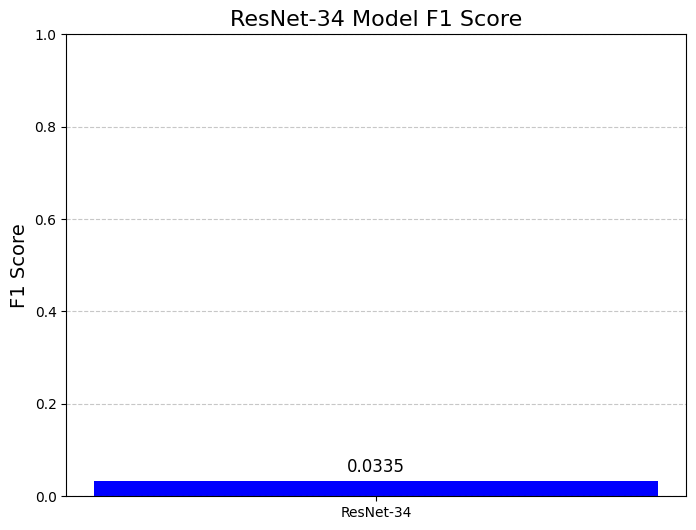

In [46]:
import matplotlib.pyplot as plt


# Create a simple bar graph for the F1 score
plt.figure(figsize=(8, 6))
plt.bar('ResNet-34', f1, color='blue', width=0.6)

# Add the value on top of the bar
plt.text('ResNet-34', f1 + 0.01, f"{f1:.4f}", ha='center', va='bottom', fontsize=12)

# Customize the graph
plt.ylim(0, 1.0)  # F1 score range is 0 to 1
plt.ylabel('F1 Score', fontsize=14)
plt.title('ResNet-34 Model F1 Score', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the figure
plt.savefig('resnet34_f1_score.png', dpi=300, bbox_inches='tight')

# Display the graph
plt.show()

In [25]:
#Add predicted labels to test_df to match train_df
predicted_labels = label_encoder.inverse_transform(predicted_labels) # Inverse transform to get original labels
test_df['predicted_label'] = predicted_labels # Assign predicted labels to the DataFrame
test_df['md5hash'] = test_df['md5hash'].str.replace('.jpg', '', regex=False)

# Save Predictions
test_df[['md5hash', 'predicted_label']].to_csv('predictions.csv', index=False)
print("Predictions saved to predictions.csv")

Predictions saved to predictions.csv


In [26]:
print(test_df.columns)

Index(['md5hash', 'fitzpatrick_scale', 'fitzpatrick_centaur', 'qc',
       'ddi_scale', 'file_path', 'predicted_label'],
      dtype='object')


In [27]:
# Save Predictions
# test_df[['md5hash', 'predicted_label']].to_csv('predictions.csv', index=False)
# print("Predictions saved to predictions.csv")